In [7]:
import warnings
warnings.filterwarnings('ignore')
import FateAxis.tool.fate_pred as fa
from scipy.stats import wilcoxon
import scanpy as sc
import numpy as np
import pandas as pd

In [8]:
adata = sc.read_h5ad('/data/jiangjunyao/easyGRN/processed_data/celltag_multi_iep.prcessed.h5ad')
sc.pp.highly_variable_genes(adata, n_top_genes=2000, subset=True,flavor='seurat_v3')

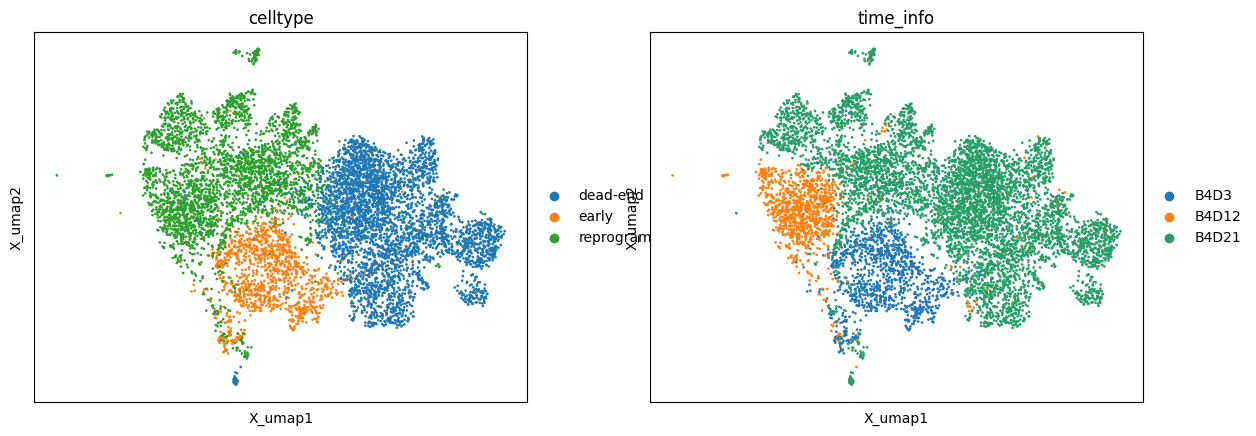

In [9]:
sc.pl.embedding(adata,color=['celltype','time_info'],basis='X_umap')

In [10]:
adata_hsc = adata[adata.obs['celltype']=='early']
adata_train = adata[adata.obs['celltype']!='early']

In [11]:
fsn = fa.fateaxis(adata_train.X.toarray(), adata_train.obs['celltype'].tolist(),'/data/jiangjunyao/FateAxis/FateAxis/config/config1.js',
                                  model_out_dir='/data/jiangjunyao/FateAxis/model_out_test/',dl_epoch=10,
                                  core_use=12,
                                  device = 'cuda:1')


In [12]:
fsn.run_clf()

In [13]:
model_prob,label = fsn.predict(adata_hsc.X.toarray(),0.95)

In [14]:
for i in label.keys():
    pd.DataFrame(label[i]).to_csv('/data/jiangjunyao/fa_result/celltag_multi_iep/pred_label/'+i+'.csv')

In [15]:
for i in model_prob.keys():
    pd.DataFrame(model_prob[i]).to_csv('/data/jiangjunyao/fa_result/celltag_multi_iep/prob_df/'+i+'.csv')

In [16]:
pd.DataFrame(fsn.weighted_probabilities).to_csv('/data/jiangjunyao/fa_result/celltag_multi_iep/weigh_prob.csv')

In [17]:
fsn.fsn.model_acc

{'pytorch_cnn_1d_0': 0.9633333333333334,
 'pytorch_cnn_1d_1': 0.9680952380952381,
 'pytorch_cnn_1d_2': 0.9647619047619047,
 'pytorch_cnn_1d_3': 0.9619047619047619,
 'pytorch_cnn_1d_4': 0.9661904761904762,
 'pytorch_cnn_1d_5': 0.9647619047619047,
 'pytorch_cnn_1d_6': 0.9709523809523809,
 'pytorch_cnn_1d_7': 0.9619047619047619,
 'pytorch_cnn_1d_8': 0.9714285714285714,
 'pytorch_cnn_1d_9': 0.9666666666666667,
 'pytorch_cnn_1d_10': 0.969047619047619,
 'pytorch_cnn_1d_11': 0.9619047619047619,
 'pytorch_cnn_1d_12': 0.9733333333333334,
 'pytorch_cnn_1d_13': 0.9704761904761905,
 'pytorch_cnn_1d_14': 0.9733333333333334,
 'pytorch_cnn_1d_15': 0.969047619047619,
 'pytorch_cnn_1d_16': 0.97,
 'pytorch_cnn_1d_17': 0.9685714285714285,
 'pytorch_cnn_1d_18': 0.9704761904761905,
 'pytorch_cnn_1d_19': 0.9714285714285714,
 'pytorch_cnn_1d_20': 0.9647619047619047,
 'pytorch_cnn_1d_21': 0.9680952380952381,
 'pytorch_cnn_1d_22': 0.9714285714285714,
 'pytorch_cnn_1d_23': 0.9733333333333334,
 'pytorch_cnn_1d_2

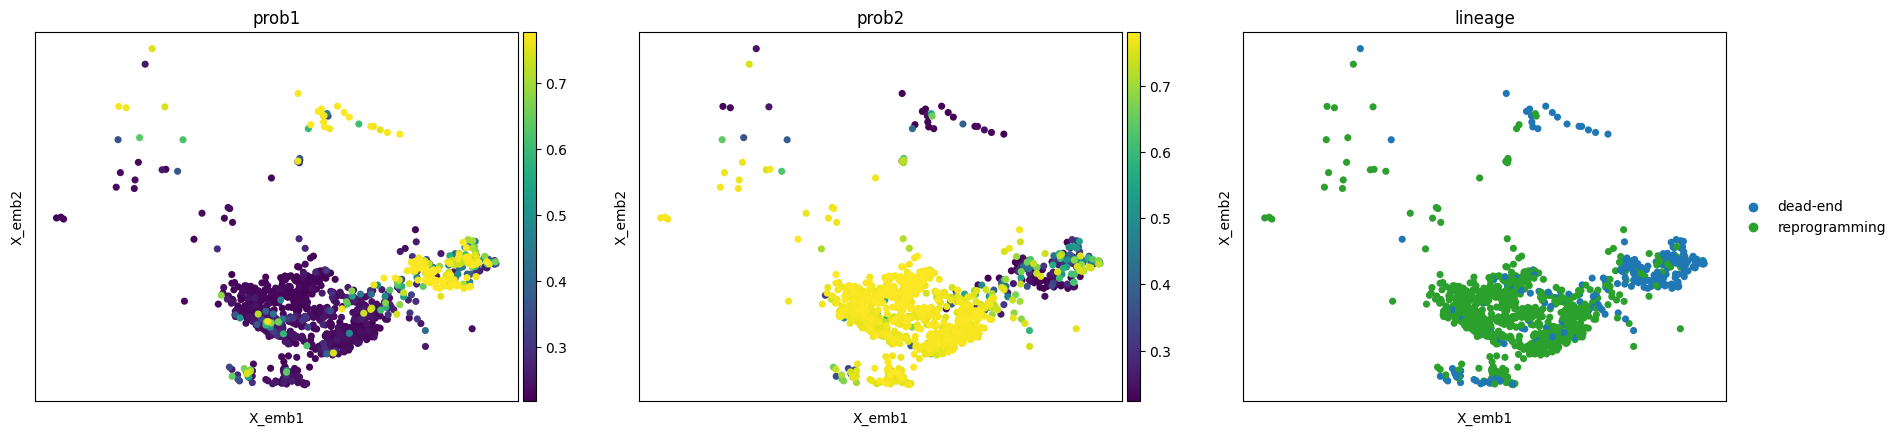

In [20]:
adata_hsc.obs['prob1'] = fsn.weighted_probabilities[:,0]
adata_hsc.obs['prob2'] = fsn.weighted_probabilities[:,1]
sc.pl.embedding(adata_hsc,color=['prob1','prob2','lineage'],basis='X_emb')